In [1]:
import cxxcimod
import time
import matplotlib.pyplot as plt

In [2]:
N = 200
res1 = []
res2 = []
res3 = []

In [3]:
bpm_v = cxxcimod.BinaryPolynomialModelVariant(cxxcimod.SPIN)
start = time.time()
for i in range(N):
    for j in range(i+1, N):
        for k in range(j+1, N):
            bpm_v.add_interaction([i, j, k], 1.0)
print("int, bpm_v:", time.time() - start)
res1.append(time.time() - start)

bpm = cxxcimod.BinaryPolynomialModel({}, cxxcimod.SPIN)
start = time.time()
for i in range(N):
    for j in range(i+1, N):
        for k in range(j+1, N):
            bpm.add_interaction([i, j, k], 1.0)
print("int, bpm:", time.time() - start)
res1.append(time.time() - start)

int, bpm_v: 1.2267811298370361
int, bpm: 1.5106401443481445


In [4]:
# Generate str index
str_index_list = []
for i in range(N):
    for j in range(i+1, N):
        for k in range(j+1, N):
            str_index_list.append([str(i) + ", " + str(j) + ", " + str(k)])

bpm_v = cxxcimod.BinaryPolynomialModelVariant(cxxcimod.SPIN)
start = time.time()
for key in str_index_list:
    bpm_v.add_interaction(key, 1.0)
print("str, bpm_v:", time.time() - start)
res2.append(time.time() - start)

bpm = cxxcimod.BinaryPolynomialModel_str({}, cxxcimod.SPIN)
start = time.time()
for key in str_index_list:
    bpm.add_interaction(key, 1.0)
print("str, bpm:", time.time() - start)
res2.append(time.time() - start)

str, bpm_v: 1.6170551776885986
str, bpm: 3.047734022140503


In [5]:
bpm_v = cxxcimod.BinaryPolynomialModelVariant(cxxcimod.SPIN)
start = time.time()
for i in range(N):
    for j in range(i+1, N):
        for k in range(j+1, N):
            bpm_v.add_interaction([(i, i), (j, j), (k, k)], 1.0)
print("int_tuple2, bpm_v:", time.time() - start)
res3.append(time.time() - start)

bpm = cxxcimod.BinaryPolynomialModel_tuple2({}, cxxcimod.SPIN)
start = time.time()
for i in range(N):
    for j in range(i+1, N):
        for k in range(j+1, N):
            bpm.add_interaction([(i, i), (j, j), (k, k)], 1.0)
print("int_tuple2, bpm:", time.time() - start)
res3.append(time.time() - start)

int_tuple2, bpm_v: 2.9231719970703125
int_tuple2, bpm: 2.0917789936065674


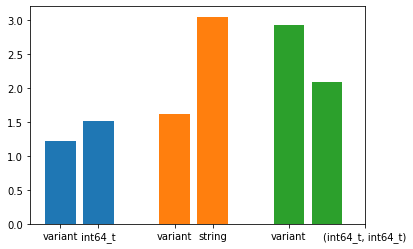

In [20]:
fig = plt.figure()

plt.bar([0,1], res1)
plt.xticks([0,1], ["variant", "int64_t"])

plt.bar([3,4], res2)
plt.xticks([3,4], ["variant", "string"])

plt.bar([6,7], res3)
plt.xticks([0,1,3,4,6,8], ["variant", "int64_t", "variant", "string", "variant", "(int64_t, int64_t)"])

fig.savefig("img.eps")